In [27]:
# Flickrで写真を検索して、ダウンロードする

from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

# APIキーとシークレットの指定
key = "524d6253c58ea0bc133fc88df6221c89"
secret = "e9ff069bcada8406"
wait_time = 1 # 待機秒数（1以上を推奨）

# キーワードとディレクトリ名を指定してダウンロード 
def main():
    go_download('マグロ寿司', 'sushi')
    go_download('サラダ', 'salad')
    go_download('麻婆豆腐', 'tofu')

# Flickr APIで写真を検索 
def go_download(keyword, dir):
    # 画像の保存パスを決定
    savedir = "./image/" + dir
    if not os.path.exists(savedir):
        os.mkdir(savedir)
    # APIを使ってダウンロード 
    flickr = FlickrAPI(key, secret, format='parsed-json')
    res = flickr.photos.search(
      text = keyword,     # 検索語
      per_page = 300,     # 取得件数
      media = 'photos',   # 写真を検索
      sort = "relevance", # 検索語の関連順に並べる
      safe_search = 1,    # セーフサーチ
      extras = 'url_q, license')
    # 検索結果を確認
    photos = res['photos']
    pprint(photos)
    try:
      # 1枚ずつ画像をダウンロード 
      for i, photo in enumerate(photos['photo']):
        url_q = photo['url_q']
        filepath = savedir + '/' + photo['id'] + '.jpg'
        if os.path.exists(filepath): continue
        print(str(i + 1) + ":download=", url_q)
        urlretrieve(url_q, filepath)
        time.sleep(wait_time)
    except:
      import traceback
      traceback.print_exc()

if __name__ == '__main__':
    main()


{'page': 1,
 'pages': 1,
 'perpage': 300,
 'photo': [{'farm': 5,
            'height_q': 150,
            'id': '4662491966',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '2',
            'owner': '15958452@N00',
            'secret': 'da30d7e212',
            'server': '4040',
            'title': 'マグロ寿司',
            'url_q': 'https://live.staticflickr.com/4040/4662491966_da30d7e212_q.jpg',
            'width_q': 150},
           {'farm': 4,
            'height_q': 150,
            'id': '3443997567',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '0',
            'owner': '28724123@N00',
            'secret': '989c7808d5',
            'server': '3571',
            'title': 'マグロ寿司',
            'url_q': 'https://live.staticflickr.com/3571/3443997567_989c7808d5_q.jpg',
            'width_q': 150},
           {'farm': 8,
            'height_q': 150,
            'id': '688

In [1]:
# 画像ファイルを読んでNumpy形式に変換

import numpy as np
from PIL import Image
import os, glob, random

outfile = "image/photos.npz" # 保存ファイル名
max_photo = 100 # 利用する写真の枚数
photo_size = 32 # 画像サイズ
x = [] # 画像データ
y = [] # ラベルデータ

def main():
    # 各画像のフォルダを読む 
    glob_files("./image/sushi", 0)
    glob_files("./image/salad", 1)
    glob_files("./image/tofu", 2)
    # ファイルへ保存 --- (*2)
    np.savez(outfile, x=x, y=y)
    print("保存しました:" + outfile, len(x))

# path以下の画像を読み込む 
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    # 各ファイルを処理
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1
        # 画像ファイルを読む
        img = Image.open(f)
        img = img.convert("RGB") # 色空間をRGBに
        img = img.resize((photo_size, photo_size)) # サイズ変更
        img = np.asarray(img)
        x.append(img)
        y.append(label)

if __name__ == '__main__':
    main()


保存しました:image/photos.npz 204


Train on 163 samples, validate on 41 samples
Epoch 1/20
163/163 [==============================] - 3s 19ms/step - loss: 0.8932 - acc: 0.4785 - val_loss: 0.8548 - val_acc: 0.4390
Epoch 2/20
163/163 [==============================] - 1s 4ms/step - loss: 0.8151 - acc: 0.5215 - val_loss: 0.6930 - val_acc: 0.5366
Epoch 3/20
163/163 [==============================] - 1s 4ms/step - loss: 0.7430 - acc: 0.7117 - val_loss: 0.6707 - val_acc: 0.7805
Epoch 4/20
163/163 [==============================] - 1s 4ms/step - loss: 0.6113 - acc: 0.7301 - val_loss: 0.7627 - val_acc: 0.6098
Epoch 5/20
163/163 [==============================] - 1s 4ms/step - loss: 0.5770 - acc: 0.7914 - val_loss: 0.5191 - val_acc: 0.8537
Epoch 6/20
163/163 [==============================] - 1s 4ms/step - loss: 0.5571 - acc: 0.7853 - val_loss: 1.0115 - val_acc: 0.6585
Epoch 7/20
163/163 [==============================] - 1s 4ms/step - loss: 0.6373 - acc: 0.7730 - val_loss: 0.6114 - val_acc: 0.7561
Epoch 8/20
163/163 [==========

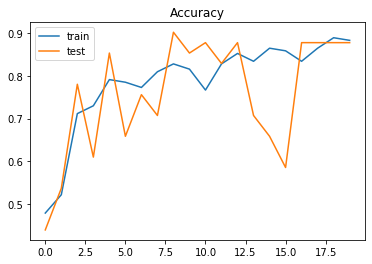

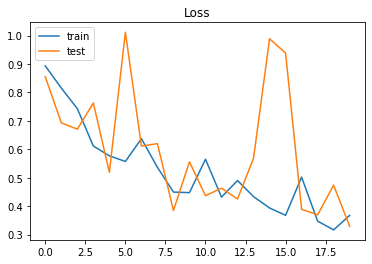

水増し前= 163
水増し後= 3912
Train on 3912 samples, validate on 41 samples
Epoch 1/20
3912/3912 [==============================] - 15s 4ms/step - loss: 0.6231 - acc: 0.7209 - val_loss: 0.8758 - val_acc: 0.7073
Epoch 2/20
3912/3912 [==============================] - 12s 3ms/step - loss: 0.3917 - acc: 0.8492 - val_loss: 0.5870 - val_acc: 0.8049
Epoch 3/20
3912/3912 [==============================] - 12s 3ms/step - loss: 0.2592 - acc: 0.8926 - val_loss: 0.5237 - val_acc: 0.8293
Epoch 4/20
3912/3912 [==============================] - 12s 3ms/step - loss: 0.1913 - acc: 0.9266 - val_loss: 0.4830 - val_acc: 0.8537
Epoch 5/20
3912/3912 [==============================] - 12s 3ms/step - loss: 0.1556 - acc: 0.9489 - val_loss: 0.5277 - val_acc: 0.8537
Epoch 6/20
3912/3912 [==============================] - 12s 3ms/step - loss: 0.0889 - acc: 0.9709 - val_loss: 2.5496 - val_acc: 0.7073
Epoch 7/20
3912/3912 [==============================] - 12s 3ms/step - loss: 0.0792 - acc: 0.9762 - val_loss: 0.6575 - val_

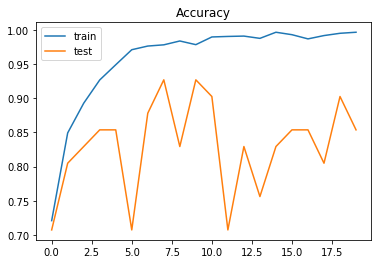

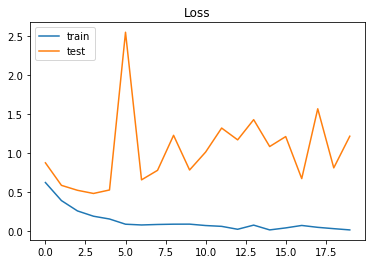

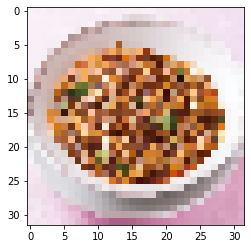

この写真は、 麻婆豆腐 で、カロリーは 648 kcal
可能性は、 100 %


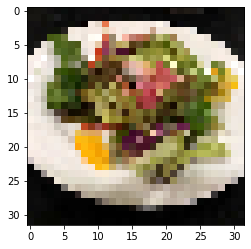

この写真は、 サラダ で、カロリーは 118 kcal
可能性は、 99 %


In [13]:
#モデルを作成

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model






#モデルを使用してCNNで学習


import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 入力と出力を指定 
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み 
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 
model = get_model(in_shape, nb_classes)

# 学習を実行 
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')







# 水増しを行ってからデータを学習

import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力を指定
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# 学習用データを水増しする 
x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        # 回転させる --- (*2)
        center = (16, 16) # 回転の中心点
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        # さらに左右反転させる 
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)

# 水増しした画像を学習用に置き換える
print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))

# CNNモデルを取得 
model = get_model(in_shape, nb_classes)

# 学習を実行 
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model.hdf5')








#判定してみる


import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

target_image = "test-tofu.jpg"

im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["寿司", "サラダ", "麻婆豆腐"]
CALORIES = [588, 118, 648]

# 保存したCNNモデルを読み込む
model = get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 答えを表示
    print("この写真は、", LABELS[idx], "で、カロリーは", CALORIES[idx],"kcal")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    check_photo_str('test-tofu.jpg')
    check_photo_str('test-salad.jpg')
